Reference =  Hands-On Machine Learning with Scikit-Learn and Tensor Flow by Aurélien Géron chapter 3

In [1]:
from sklearn.datasets import fetch_mldata

mnist  = fetch_mldata("MNIST original")
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [2]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

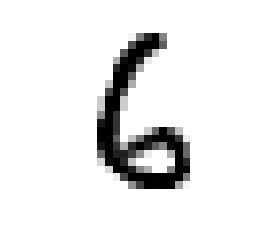

In [4]:
% matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

some_digit =  X[41000]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()


In [5]:
y[41000]

6.0

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [8]:
# Lets shuffle the data so that we ensures that all the digits are in both set.
# shuffling is a bad idea when we are working on time series data(such as stock market prices or weather condition)

import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

Training a binary classifier

In [9]:
y_train_6 = (y_train == 6)
y_test_6  = (y_test == 6)

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_6)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [10]:
sgd_clf.predict([some_digit])

array([ True])

# Performance Measures

1. Measuring Accuracy with Cross- Validation

In [11]:
# 1.Approach
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

sk_folds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in sk_folds.split(X_train, y_train_6):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    X_test_folds = X_train[test_index]
    y_train_folds = y_train_6[train_index]
    y_test_folds = y_train_6[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pre = clone_clf.predict(X_test_folds)
    n_correct  = sum(y_pre == y_test_folds)
    print("accuracy: ", n_correct/len(y_pre))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy:  0.9796510174491275


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy:  0.97775


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy:  0.9768488424421221


In [12]:
# let's use cross_val_score() function to evaluate our SGDClassifier model using k fold

from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_6, cv = 3, scoring = "accuracy")

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and defa

array([0.97965102, 0.97775   , 0.97684884])

Wow 97% accuracy...!! Isn't it great??? But let's look at the classifier we built it only classifies class 6 and just classifies every image as "not 6" class.

In [13]:
from sklearn.base import BaseEstimator

class Never6Classifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self,X):
        return np.zeros((len(X), 1), dtype = bool)

never_6_clf = Never6Classifier()
cross_val_score(never_6_clf, X_train, y_train_6,cv = 3, scoring = "accuracy")

array([0.9028 , 0.89695, 0.90435])

It has over 90% accuracy! means if you guess a image not 6 you will get above 90% accuracy. This is why accuracy is not preferred performance measures for clssifiers, especially when we are dealing with skewed datasets(Where some classes are much more frequent than others).

# Confusion Matrix

The general idea is to count the number of times instances of class A are classified as Class B. To compute the confusion matrix, you first need to have a set of predictions, so they compared with the actual targets. we can use cross_val_predict() function:

In [14]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_6, cv = 3)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and defa

In [15]:
# Now we are ready to launch confusion matrix using the confusion_matrix() function

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_6, y_train_pred)

array([[53292,   790],
       [  525,  5393]], dtype=int64)

Each row in confusion metrix is represent as "actual class" and each column represent as "predicted class". First row of this matrix is consider as non 6 class and  53371 were correctly classified (True negative) and 711 were wrongly classified as 6s class (False positive).
The second row considers images of 6s (the positive class) and 584 were wrongly classified as non 6s class (false negative) and 5334 were correctly classified as 6s class(true positive).
A perfect classfier only have true negative and true positive class. so it's confusion matrix only have nonzero values on it's diagonal from (top left to bottom right)

In [16]:
confusion_matrix(y_train_6, y_train_6)

array([[54082,     0],
       [    0,  5918]], dtype=int64)

The confusion metrics gives us a lot information but we prefer concise metric. An interesting one to look at the accuracy of the
positive predictions, This is called the precision of the classifier.

Precision = TP/TP+FP

Precision is typically used with another metric named recall also called sensitivity or true positive rate(TPR).

Recall = TP/TP+FN


In [17]:
# Import precision score and recall score from sklearn metrics

from sklearn.metrics import precision_score, recall_score

precision_score(y_train_6, y_train_pred)  # 5232/(5232+666)

0.8722303089115316

In [18]:
recall_score(y_train_6, y_train_pred)  # 5232/(5232+686)

0.9112875971612031

It is often convenient to combine precision and recall into a single metric called the F1 score, in particular if you need a simple way to compare two classifiers. The F1 score is the harmonic mean of precision and recall whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values. As a result, the classifier will only get a high F1 score if both recall and precision are high.


F1 score = 2/((1/precision) + (1/recall)) = 2* (precision*recall)/(precision+recall)

In [19]:
from sklearn.metrics import f1_score
f1_score(y_train_6, y_train_pred)

0.891331294934303

sklearn does not let us set threshold directly, but it gives us access the decision scores that it uses to make predictions.

In [20]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([158859.00135183])

In [21]:
threshold = 0 
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([ True])

How can we decide which threhold to use? for this we first need to get scores of all instances in the training set using cross_val_predict() function again

In [22]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_6, cv = 3, method = "decision_function")

# Now we can compute precision and recall for all posible thresholds using the precision_recall_curve() function

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds  = precision_recall_curve(y_train_6, y_scores)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and defa

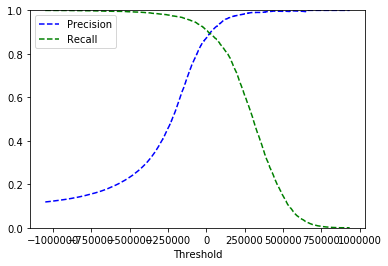

In [23]:
# finally we can plot precision and recall functions of threshold value using matplotlib

def plot_precision_recall_vs_threshold(precision, recalls, thresholds):
    plt.plot(thresholds, precision[:-1], "b--", label = "Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label = "Recall")
    plt.xlabel("Threshold")
    plt.legend(loc = "upper left")
    plt.ylim([0,1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

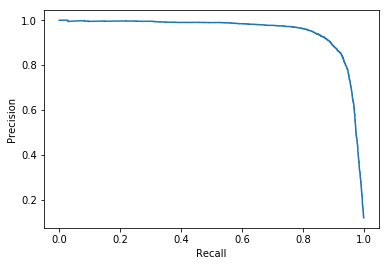

In [24]:
plt.plot(recalls[:-1],precisions[:-1])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


In [25]:
y_train_pred_90 = (y_scores > 70000)

In [26]:
precision_score(y_train_6, y_train_pred_90)

0.9274836838288615

In [27]:
recall_score(y_train_6, y_train_pred_90)

0.8644812436633998

# The ROC Curve

The ROC curve plots the true positive rate(another name of recall) against the false positive rate. The FPR is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus true negative rate, which is the ratio of negative instances that are classified as negative. The TNR is also called specificity. 


ROC curve plots between sensitivity(recall) versus 1-specificity

In [28]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_6,y_scores)

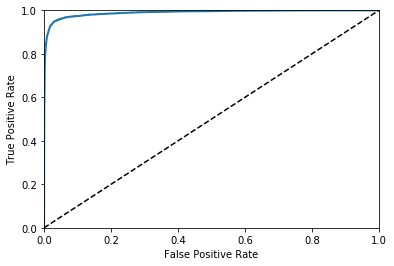

In [29]:
# then we can plot the FPR against the TPR using matplotlib.

def plot_roc_curve(fpr,tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label= label)
    plt.plot([0,1],[0,1], "k--")
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
plot_roc_curve(fpr, tpr)
plt.show()

1. A good classifier stays as far away from the dotted line as possible(toward top left corner).
2. One way to compare classifier is to measure the area under the curve(AUC).

In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_6, y_scores)

0.9892868300235113

Let's train a RandomForestClassifier and compare it's ROC curve and ROC AUC score to the SGDClassifier. RandomForestClassifier does not have decision_function() method. Instead it has predict_proba() method. 

In [31]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_6, cv  = 3, method = "predict_proba")

In [32]:
y_scores_forest = y_probas_forest[:,1]  #score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_6, y_scores_forest)

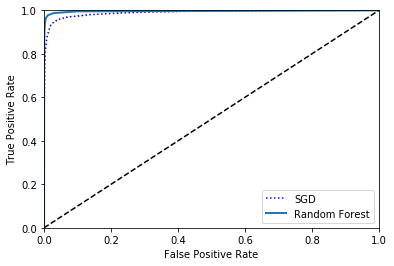

In [33]:
plt.plot(fpr,tpr, "b:", label = "SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc = "lower right")
plt.show()

In [34]:
roc_auc_score(y_train_6, y_scores_forest)

0.9964167351096244

In [35]:

y_pred_forest = cross_val_predict(forest_clf, X_train, y_train_6, cv = 3)

In [36]:
precision_score_forest = precision_score(y_train_6, y_pred_forest)
precision_score_forest

0.9873580065958226

In [37]:
recall_score(y_train_6, y_pred_forest)

0.9106116931395741

# Multiclass Classification

Some algorithms (such as RandomForestClassifiers and naive bays classifiers) are capable of handling multiple classes directly. Others(such as Support Vector Machine Classifiers or Linear Classifiers) are strictly binary classifiers.

there are two types of multiclass classification problems are - 
1. One vs All (OvA)
2. One vs One (OvO)

In [38]:
sgd_clf.fit(X_train, y_train)  # y_train not y_train_6
sgd_clf.predict([some_digit])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([6.])

In [39]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-373395.55729495, -557048.0115778 , -177958.30386503,
        -584866.77513549, -408506.98071336, -255288.92712329,
         158859.00135183, -617683.62731599, -349642.21738363,
        -688323.76188642]])

In [40]:
np.argmax(some_digit_scores)

6

In [41]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [42]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state = 42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and defa

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and defa

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and defa

array([6.])

In [43]:
len(ovo_clf.estimators_)

45

In [44]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([6.])

In [45]:
forest_clf.predict_proba([some_digit])

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [46]:
# let's check throgh cross_val_score to evaluate accuracy
cross_val_score(sgd_clf, X_train, y_train, cv = 3 , scoring = "accuracy")

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and defa

array([0.84313137, 0.87369368, 0.83162474])

In [47]:
cross_val_score(forest_clf, X_train, y_train, cv = 3, scoring = "accuracy")

array([0.94006199, 0.93709685, 0.94189128])

In [48]:
# This is not such a bad accuracy but from scaling the inputs we can improve our accuracy
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring = "accuracy")

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and defa

array([0.91106779, 0.90774539, 0.91008651])

# Error Analysis

One way to do this find out what type of errors it makes
1. First you can look for confusion matrix.

In [49]:
y_train_prediction  = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv = 3)
cnf_mx = confusion_matrix(y_train, y_train_prediction)
cnf_mx

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and defa

array([[5736,    2,   26,   10,   12,   49,   41,    6,   38,    3],
       [   2, 6469,   46,   25,    6,   37,   10,   12,  123,   12],
       [  53,   40, 5347,  105,   74,   28,   87,   60,  151,   13],
       [  42,   38,  148, 5338,    2,  241,   34,   56,  132,  100],
       [  23,   23,   43,    9, 5362,    8,   50,   29,   88,  207],
       [  70,   45,   39,  183,   77, 4608,  113,   28,  169,   89],
       [  32,   22,   60,    1,   42,   86, 5630,    5,   40,    0],
       [  27,   21,   69,   32,   50,   12,    5, 5783,   16,  250],
       [  50,  154,   79,  172,   15,  147,   55,   26, 5003,  150],
       [  42,   26,   26,   91,  150,   32,    2,  200,   78, 5302]],
      dtype=int64)

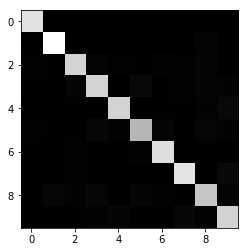

In [50]:
plt.imshow(cnf_mx, cmap = plt.cm.gray)
plt.show()

Since most of the images are on the main diagonal, which means that they were classified correctly

In [51]:
row_sums = cnf_mx.sum(axis =1, keepdims = True)
norm_cnf_mx = cnf_mx/row_sums
norm_cnf_mx


array([[9.68428161e-01, 3.37666723e-04, 4.38966740e-03, 1.68833361e-03,
        2.02600034e-03, 8.27283471e-03, 6.92216782e-03, 1.01300017e-03,
        6.41566774e-03, 5.06500084e-04],
       [2.96647879e-04, 9.59507565e-01, 6.82290122e-03, 3.70809849e-03,
        8.89943637e-04, 5.48798576e-03, 1.48323939e-03, 1.77988727e-03,
        1.82438446e-02, 1.77988727e-03],
       [8.89560255e-03, 6.71366230e-03, 8.97448808e-01, 1.76233635e-02,
        1.24202753e-02, 4.69956361e-03, 1.46022155e-02, 1.00704935e-02,
        2.53440752e-02, 2.18194025e-03],
       [6.85043223e-03, 6.19801011e-03, 2.41396183e-02, 8.70657315e-01,
        3.26211059e-04, 3.93084326e-02, 5.54558800e-03, 9.13390964e-03,
        2.15299299e-02, 1.63105529e-02],
       [3.93700787e-03, 3.93700787e-03, 7.36049298e-03, 1.54056830e-03,
        9.17836357e-01, 1.36939404e-03, 8.55871277e-03, 4.96405341e-03,
        1.50633345e-02, 3.54330709e-02],
       [1.29127467e-02, 8.30105147e-03, 7.19424460e-03, 3.37576093e-02,
   

In [52]:
np.fill_diagonal(norm_cnf_mx, 0)

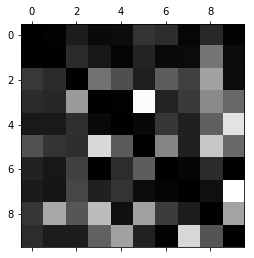

In [53]:
plt.matshow(norm_cnf_mx, cmap = plt.cm.gray)
plt.show()

In [54]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

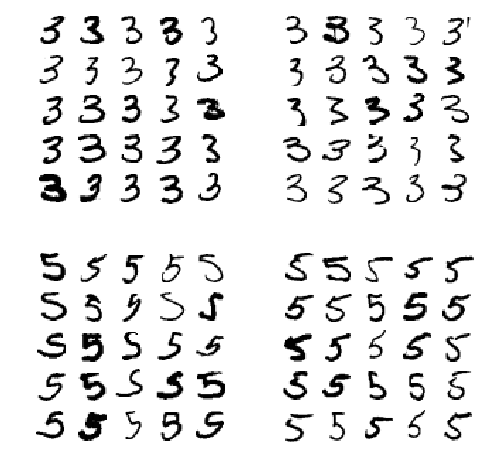

In [55]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a)& (y_train_prediction == cl_a)]
X_ab = X_train[(y_train == cl_a)& (y_train_prediction == cl_b)]
X_ba = X_train[(y_train == cl_b)& (y_train_prediction == cl_a)]
X_bb = X_train[(y_train == cl_b)& (y_train_prediction == cl_b)]

plt.figure(figsize = (8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row = 5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row = 5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row = 5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row = 5)
plt.show()

# Multilabel Classification

In [56]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train%2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [57]:
%%time
knn_clf.predict([some_digit])

Wall time: 249 ms


array([[False, False]])

In [58]:

# let's compute F1 score for knn classifiers
# y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv = 3)
# f1_score(y_train, y_train_knn_pred, average="macro")

In [59]:
# if labels are not distributed equally then it is good to weight each label 
# f1_score(y_train, y_train_knn_pred, average = "weighted")

# Multiouput Classification

This is simply a generalization of multilabel classification where each label can be multiclass(i.e, it can have more than two posible values)

In [60]:
# Let's start creating training and test sets by taking the MNIST images and adding noise to their pixel intensities using 
# Numpy's randint() function. The target images will be the original images:


# noise = np.random.randint(0,100, (len(X_train),784))
# X_train_mod = X_train + noise
# noise_1 = np.random.randint(0,100, (len(X_test), 784))
# X_test_mod = X_test + noise_1

# y_train_mod = X_train
# y_test_mod = X_test

# knn_clf.fit(X_train_mod, y_train_mod)
# clean_digit = knn_clf.predict([X_test_mod[some_index]])
# plot_digit(clean_digit)